In [64]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [84]:
# Load a sample CSV for a specific crime type (e.g., "homicide")
crime_type = "burglary"
file_path = f"/Users/gregknowles/Downloads/UTA-VIRT-DATA-PT-11-2024-U-LOLC-main-06-Python-APIs-3-Activities/06-Python-APIs/3/Activities/CN/NationalCrime/burglary_national_data.csv"

In [85]:
# Check if the file exists at the specified path
file_path = f"/Users/gregknowles/Downloads/UTA-VIRT-DATA-PT-11-2024-U-LOLC-main-06-Python-APIs-3-Activities/06-Python-APIs/3/Activities/CN/NationalCrime/burglary_national_data.csv"

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist at the specified path.")

File exists!


In [86]:
try:
    # Load the data
    data = pd.read_csv(file_path)

    # Check the columns and ensure "Month" exists
    if "Month" in data.columns:
        # Convert "Month" column to datetime
        data["Month"] = pd.to_datetime(data["Month"], errors='coerce')
    
    
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

       Month  Total Crimes  Clearances  Prosecuted %  Crime(Per 100k)  \
0 2000-01-01        136541       15989          0.12            53.60   
1 2000-02-01        121601       15361          0.13            47.82   
2 2000-03-01        136231       17580          0.13            53.63   
3 2000-04-01        130786       16108          0.12            51.54   
4 2000-05-01        143827       17501          0.12            56.72   

   Prosecutions(Per 100k)  Total Pop  Partic Pop  Pop Coverage  
0                    6.28  281421906   254741154         90.52  
1                    6.04  281421906   254315123         90.37  
2                    6.92  281421906   254039019         90.27  
3                    6.35  281421906   253740964         90.16  
4                    6.90  281421906   253586618         90.11  


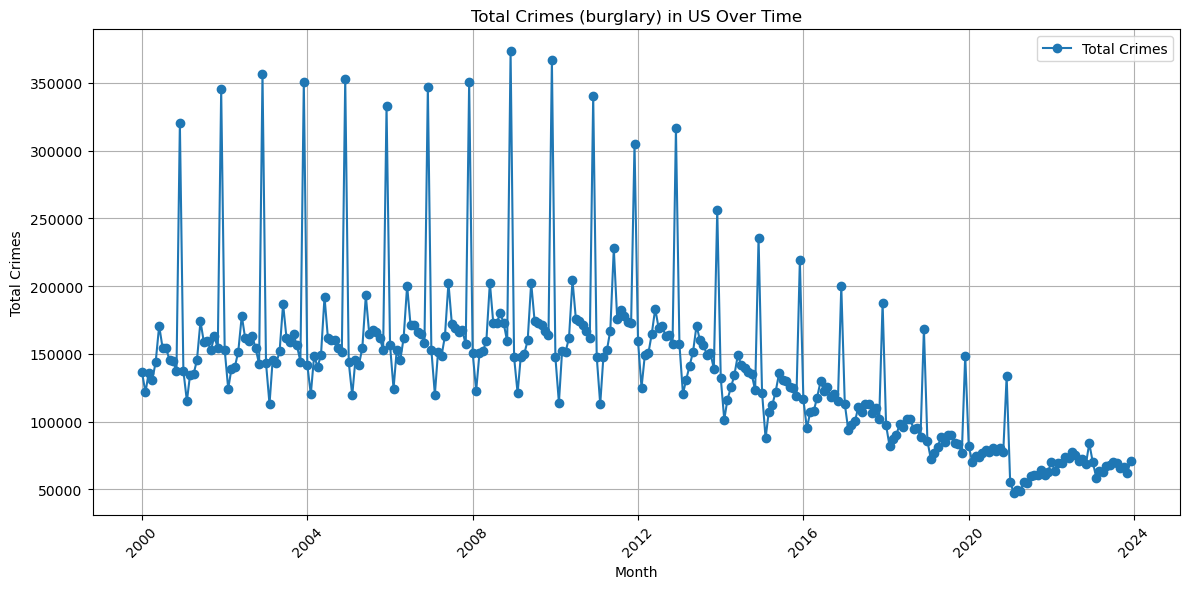

In [87]:
# Filter
data['Month'] = pd.to_datetime(data['Month'])
Nat_data = data[data['Month'].dt.year.isin(range(2000, 2024))]

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(Nat_data["Month"], Nat_data["Total Crimes"], label="Total Crimes", marker="o")
plt.title(f"Total Crimes (burglary) in US Over Time")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [73]:

data = pd.read_csv(file_path)
data["Month"] = pd.to_datetime(data["Month"])
data["Year"] = data["Month"].dt.year

      Total Crimes
Year              
2000        394640
2001        410411
2002        409120
2003        401032
2004        390436
2005        405589
2006        441809
2007        440881
2008        437985
2009        404135
2010        364978
2011        352047
2012        352655
2013        341538
2014        318768
2015        321517
2016        328677
2017        312539
2018        280380
2019        262734
2020        235914
2021        137666
2022        219922
2023        214935


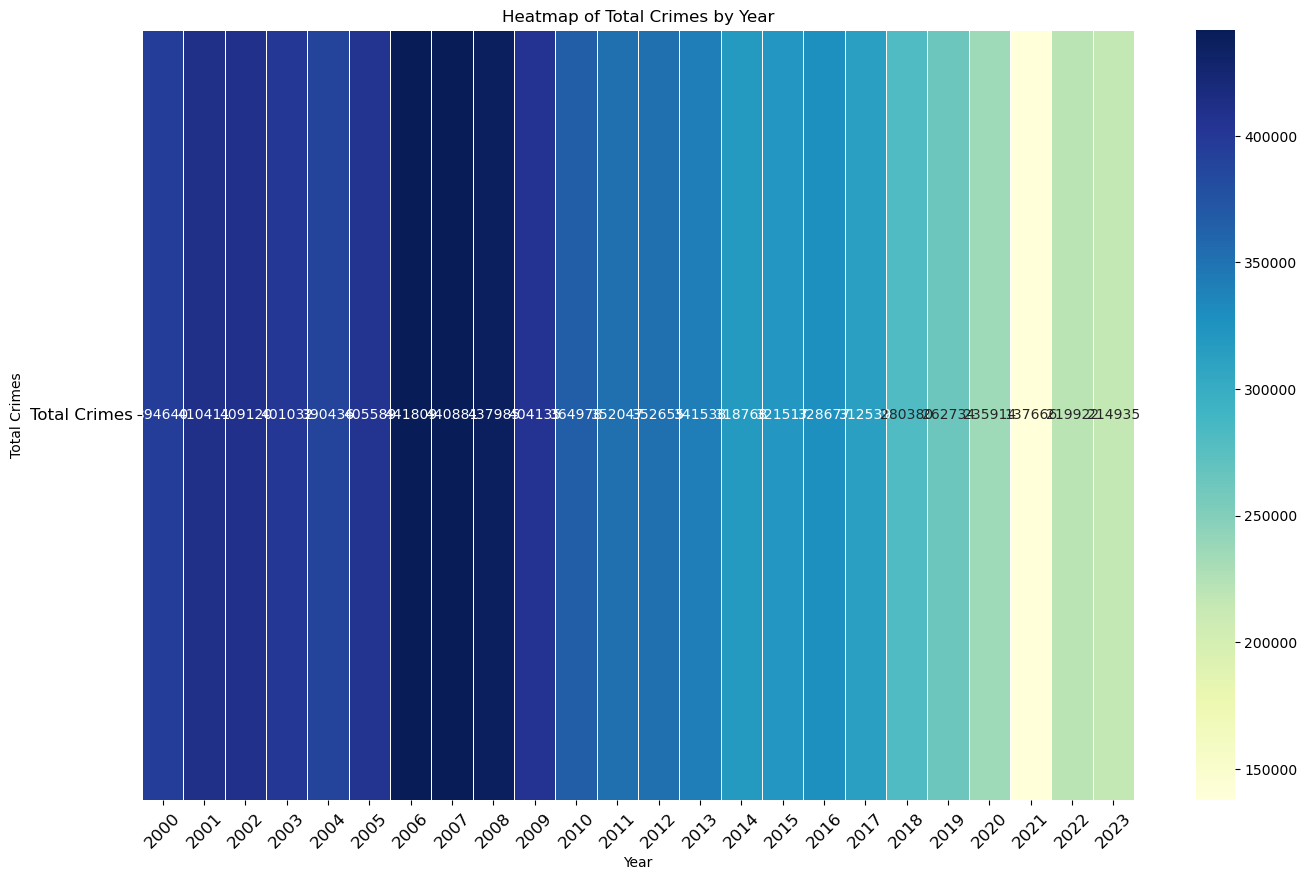

In [83]:


# Check if required columns exist
if "Year" in data.columns and "Total Crimes" in data.columns:
    # Create pivot table for heatmap
    heatmap_data = data.pivot_table(index="Year", values="Total Crimes", aggfunc="sum")
    
    # Check pivot table
    print(heatmap_data)
    
    # Plot heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(heatmap_data.T, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
    plt.title("Heatmap of Total Crimes by Year")
    plt.xlabel("Year")
    plt.ylabel("Total Crimes")
    plt.xticks(rotation=45, fontsize=12) 
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout
    plt.show()